# Acquire and Analyze Project

# Initialize Twitter API 

In [67]:
import tweepy
import pandas as pd
import tweepy
import os
import datetime
import re
from string import punctuation
from nltk.probability import FreqDist
import nltk
import numpy as np
from collections import Counter,defaultdict
from pprint import pprint
from nltk.corpus import stopwords
from collections import Counter
sw = stopwords.words('english')
import sqlite3
import spacy
from subject_object_extraction import findSVOs
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

In [68]:
from fanok_api_keys import api_key, api_key_secret, bearer_token,access_token, access_token_secret

In [69]:
#authentication

auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token, access_token_secret)

#API Connection

api = tweepy.API(auth)

# Pulling our text data (Republican)

In [70]:
user = 'tedcruz'
repub_data = []
tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 300, 
                        tweet_mode = 'extended').items(300)

for tweet in tweets:
    repub_data.append([tweet.user.screen_name, tweet.full_text])

In [71]:
user = 'mtgreenee'

tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 300, 
                        tweet_mode = 'extended').items(300)

for tweet in tweets:
    repub_data.append([tweet.user.screen_name, tweet.full_text])


In [72]:
user = 'laurenboebert'

tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 300, 
                        tweet_mode = 'extended').items(300)

for tweet in tweets:
    repub_data.append([tweet.user.screen_name, tweet.full_text])

In [73]:
keywords = '#MAGA'

tweets = tweepy.Cursor(api.search_tweets,q = keywords, 
                        count = 200, 
                        tweet_mode = 'extended').items(200)

for tweet in tweets:
    repub_data.append([keywords,tweet.full_text])

# Pulling our text data (Democratic)

In [74]:
user = 'AOC'
dem_data = []
tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 300, 
                        tweet_mode = 'extended').items(300)

for tweet in tweets:
    dem_data.append([tweet.user.screen_name, tweet.full_text])

In [75]:
user = 'potus'

tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 300, 
                        tweet_mode = 'extended').items(300)

for tweet in tweets:
    dem_data.append([tweet.user.screen_name, tweet.full_text])

In [76]:
user = 'HillaryClinton'

tweets = tweepy.Cursor(api.user_timeline,screen_name = user, 
                        count = 300, 
                        tweet_mode = 'extended').items(300)

for tweet in tweets:
    dem_data.append([tweet.user.screen_name, tweet.full_text])

In [77]:
keywords = '#Democrat'

tweets = tweepy.Cursor(api.search_tweets,q = keywords, 
                        count = 200, 
                        tweet_mode = 'extended').items(200)

for tweet in tweets:
    dem_data.append([keywords,tweet.full_text])

# Building our Republican DF

In [78]:
columns = ['User/Keyword', 'Tweets']
republican_df = pd.DataFrame(repub_data, columns = columns)

In [79]:
republican_df

,User/Keyword,Tweets
0,tedcruz,"To be fair, I’ve always been a fan of the Marq..."
1,tedcruz,RT @PTBwrites: Still think the fact that the U...
2,tedcruz,tragic https://t.co/chBz10tnEG
3,tedcruz,RT @GOP: Raphael Warnock voted YES on sending ...
4,tedcruz,Yes. Yes. Yes. https://t.co/XrkA4HrYJy
...,...,...
1095,#MAGA,RT @nausn_art: »Happy #Thanksgiving« \n\n#Twit...
1096,#MAGA,".@HerschelWalker needs mental help, not a seat..."
1097,#MAGA,After 2021 Red Wave Turns Into Tsunami #MAGA ...
1098,#MAGA,#Arizona You can’t make this #shit up! The law...


In [81]:
republican_df.to_csv('Republican_text')

# Building our Democratic DF

In [82]:
columns = ['User/Keyword', 'Tweets']
democratic_df = pd.DataFrame(dem_data, columns = columns)

In [83]:
democratic_df

,User/Keyword,Tweets
0,AOC,@HacknerTyler @ryangrim Perfectly reasonable. ...
1,AOC,"@ryangrim Yes, and not just national leadershi..."
2,AOC,Glad we are on the same page re: railworkers’ ...
3,AOC,@CathoIicConvert Had to Google this one to rec...
4,AOC,RT @FlyingWithSara: Put your Twitter hands dow...
...,...,...
1095,#Democrat,Biden Administration Put Sam Brinton on Leave ...
1096,#Democrat,"Once again, a #republican tanked the economy.\..."
1097,#Democrat,RT @Bannons_WarRoom: 🧐 @Athan_K outsiouroumbas...
1098,#Democrat,RT @Bannons_WarRoom: 🧐 @Athan_K outsiouroumbas...


In [84]:
democratic_df.to_csv('Democratic_text')

# Cleaning Tweets for Analysis

In [85]:
punct_set = punctuation

In [86]:
repub_names = ['ted', 'cruz', 'tedcruz', 'mtgreene', 'lauren','boebert']

In [87]:
#First let's make both our lists long strings

repub_data_list= [','.join(w) for w in repub_data]

#This gives us a long string of text
repub_data_string = ''.join(repub_data_list)

#this tokenizes our tweet data
repub_data_tokenized_string = [w.lower() for w in repub_data_string.split() if w.lower() not in repub_names and w.lower() not in sw and w.isalpha() and w not in punct_set]

#this joins our tokenized/cleaned list above
repub_data_tokenized_string_joined = ' '.join(repub_data_tokenized_string)

In [88]:
#repub_data_string
#repub_data_tokenized_string

In [89]:
dem_names = ['AOC', 'POTUS', 'HillaryClinton']

In [90]:
#First let's make both our lists long strings

dem_data_list= [','.join(w) for w in dem_data]

#This gives us a long string of text
dem_data_string = ''.join(dem_data_list)

#this tokenizes our tweet data
dem_data_tokenized_string = [w.lower() for w in dem_data_string.split() if w.lower() not in dem_names and w.lower() not in sw and w.isalpha() and w not in punct_set]

#this joins our tokenized/cleaned list above
dem_data_tokenized_string_joined = ' '.join(dem_data_tokenized_string)

In [91]:
#dem_data_string
#dem_data_tokenized_string

# Analysis 1: Most Popular Words

In [92]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Most Popular Words: Republican

In [93]:
repub_freqdist = FreqDist()

for word in repub_data_tokenized_string:
    repub_freqdist[word]+=1  

In [94]:
repub_top_words = repub_freqdist.most_common(20) 

In [95]:
columns = ['word', 'count']

repub_words_df = pd.DataFrame(repub_top_words,columns = columns) 

In [96]:
#repub_words_df

<AxesSubplot:title={'center':'Republican Tweets: Top 20 Words'}, xlabel='Top Words', ylabel='Word Count'>

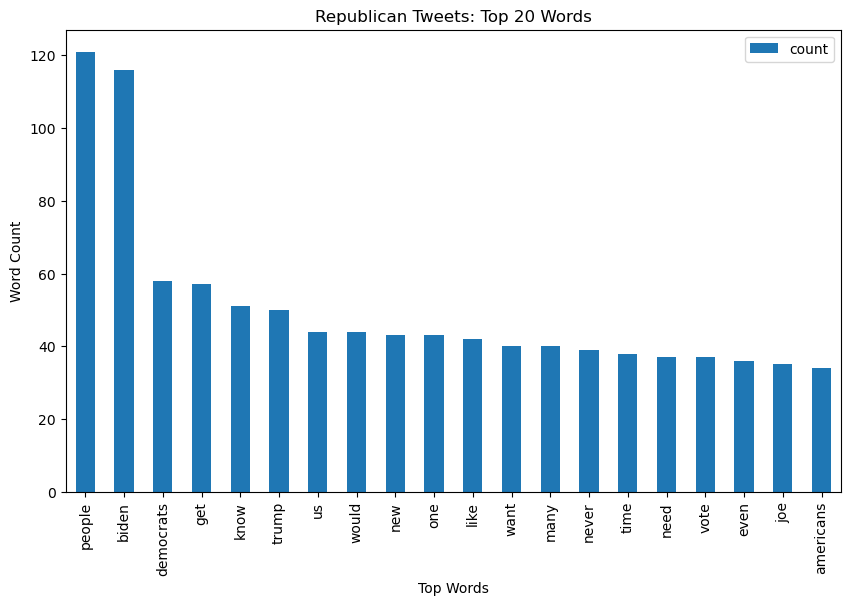

In [97]:
repub_words_df.plot(kind='bar', figsize=(10,6), x='word', y='count', ylabel='Word Count',xlabel='Top Words', 
                    title='Republican Tweets: Top 20 Words')

# Most Popular Words: Democratic

In [98]:
dem_freqdist = FreqDist()

for word in dem_data_tokenized_string:
    dem_freqdist[word]+=1  

In [99]:
dem_top_words = dem_freqdist.most_common(20) 

In [100]:
columns = ['word', 'count']

dem_words_df = pd.DataFrame(dem_top_words,columns = columns) 

In [101]:
#dem_words_df

<AxesSubplot:title={'center':'Democratic Tweets: Top 20 Words'}, xlabel='Top Words', ylabel='Word Count'>

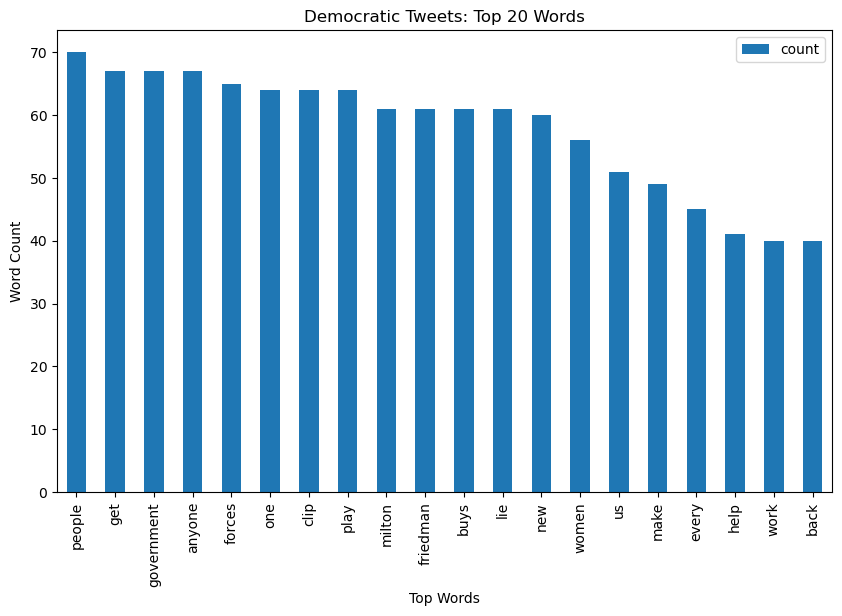

In [102]:
dem_words_df.plot(kind='bar', figsize=(10,6), x='word', y='count', ylabel='Word Count',xlabel='Top Words', 
                    title='Democratic Tweets: Top 20 Words')

# Most Popular Orgs: Republican

In [103]:
doc = nlp(repub_data_tokenized_string_joined)

In [104]:
repub_ents = []

if doc.ents:
    for ent in doc.ents:
        row = ent.text, ent.label_
        repub_ents.append(row)

In [105]:
#repub_ents

In [106]:
columns = ['Word', 'Entity']

In [107]:
repub_ents_df = pd.DataFrame(repub_ents , columns = columns)
#repub_ents_df

In [108]:
repub_ents_ORG_df = repub_ents_df.where(repub_ents_df['Entity'] == 'ORG')

In [109]:
repub_ents_ORG_df = repub_ents_ORG_df['Word'].value_counts()
#repub_ents_ORG_df

<AxesSubplot:title={'center':'Republican Tweets: Top 20 Orgs'}, xlabel='Top Orgs', ylabel='Instance Count'>

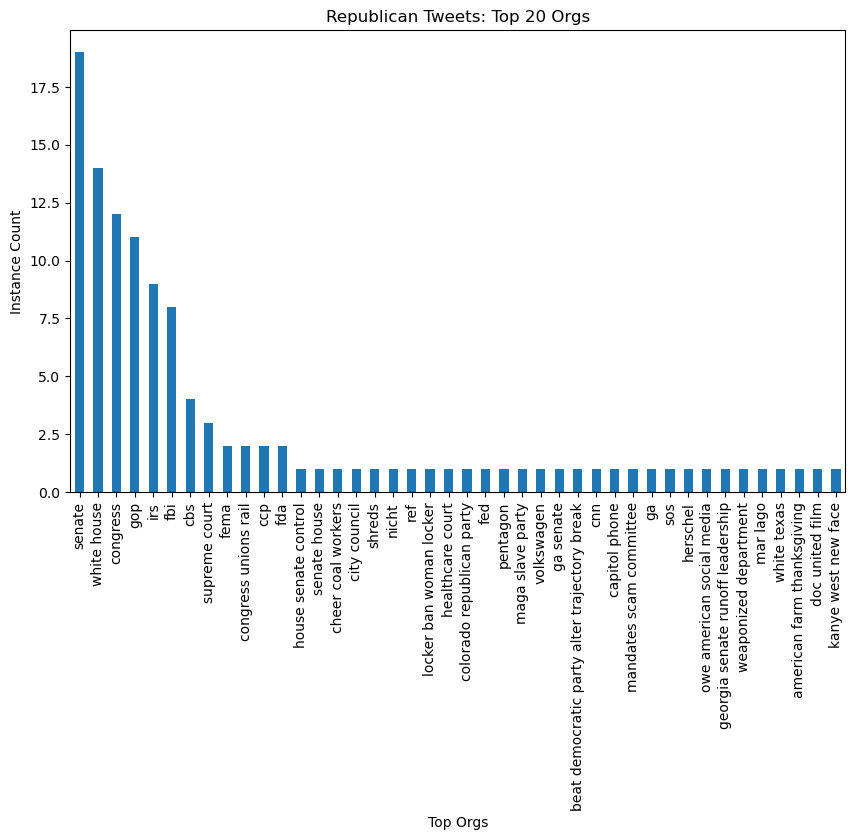

In [110]:
repub_ents_ORG_df.plot(kind='bar', figsize=(10,6), x='word', y='count', ylabel='Instance Count',xlabel='Top Orgs', 
                    title='Republican Tweets: Top 20 Orgs')

# Most Popular Orgs: Democratic

In [111]:
doc = nlp(dem_data_tokenized_string_joined)

In [112]:
dem_ents = []

if doc.ents:
    for ent in doc.ents:
        row = ent.text,ent.label_
        dem_ents.append(row)

In [113]:
#dem_ents

In [114]:
columns = ['Word', 'Entity']

In [115]:
dem_ents_df = pd.DataFrame(dem_ents , columns = columns)
#dem_ents_df

In [116]:
dem_ents_ORG_df = dem_ents_df.where(dem_ents_df['Entity'] == 'ORG')

In [117]:
dem_ents_ORG_df = dem_ents_ORG_df['Word'].value_counts()
#dem_ents_ORG_df

<AxesSubplot:title={'center':'Democratic Tweets: Top 20 Orgs'}, xlabel='Top Orgs', ylabel='Instance Count'>

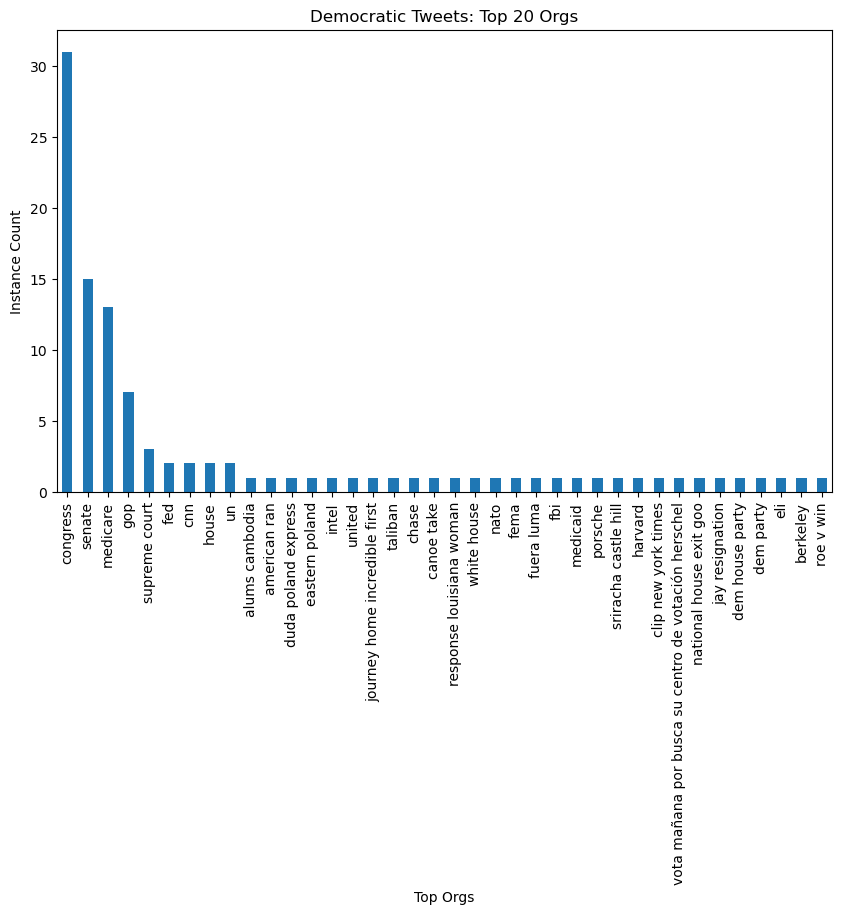

In [118]:
dem_ents_ORG_df.plot(kind='bar', figsize=(10,6), x='word', y='count', ylabel='Instance Count',xlabel='Top Orgs', 
                    title='Democratic Tweets: Top 20 Orgs')

# Analysis 2: Text Patterns

First lets add our Text Patterns function

In [119]:
def get_patterns(text)  :
    """
        This function takes text as an input and returns a dictionary of statistics,
        after cleaning the text. 
    
    """
    
    # We'll make things a big clearer by initializing the 
    # statistics here. These are placeholder values.
    total_tokens = 0
    unique_tokens = 0
    avg_token_len = 0.0
    lex_diversity = 0.0
    top_10 = Counter()
    
    # Do your tokenization and normalization here
    
    text = [w.lower() for w in text.split() if w.lower() not in sw and w.isalpha()]
    
    
    
    # Calculate your statistics here
    total_tokens = len(text)
    unique_tokens = len(set(text))
    avg_token_len = sum(len(w) for w in text) / len(text)
    lex_diversity = unique_tokens/total_tokens
    text_count= Counter(text)
    top_10 = text_count.most_common(10)
    
    
    # Now we'll fill out the dictionary. 
    
    results = {'tokens':total_tokens,
               'unique_tokens':unique_tokens,
               'avg_token_length':avg_token_len,
               'lexical_diversity':lex_diversity,
               'top_10':top_10}

    return(results)


# Republican Results

In [120]:
get_patterns(repub_data_string)

{'tokens': 10711,
 'unique_tokens': 3456,
 'avg_token_length': 6.038651853234992,
 'lexical_diversity': 0.3226589487442816,
 'top_10': [('people', 121),
  ('biden', 116),
  ('democrats', 58),
  ('get', 57),
  ('know', 51),
  ('trump', 50),
  ('us', 44),
  ('would', 44),
  ('new', 43),
  ('one', 43)]}

# Democratic Results

In [121]:
get_patterns(dem_data_string)

{'tokens': 10865,
 'unique_tokens': 3365,
 'avg_token_length': 6.1780027611596875,
 'lexical_diversity': 0.3097100782328578,
 'top_10': [('people', 70),
  ('get', 67),
  ('government', 67),
  ('anyone', 67),
  ('forces', 65),
  ('one', 64),
  ('clip', 64),
  ('play', 64),
  ('milton', 61),
  ('friedman', 61)]}

# Analysis 3: Parsing

First let's import our spacy package

In [122]:
import sqlite3
import spacy
from subject_object_extraction import findSVOs

In [123]:
## now let's set up our parser
parser = spacy.load('en_core_web_sm')

# Republican Parsing

In [124]:
republican_string = [w for w in repub_data_string if w.isalpha and w not in punct_set]
republican_string = ''.join(republican_string)

In [125]:
republican_string = parser(republican_string)

In [126]:
republican_svos = (findSVOs(republican_string))

In [127]:
count_republican = Counter(republican_svos)

# Republican Results: Most Common 20 SVOS

In [128]:
count_republican.most_common(20)

[(('it', '’s', 'time'), 4),
 (('rinos', 'supporting', 'conservatives'), 4),
 (('media', 'tell', 'truth'), 3),
 (('there', 'is', 'nothing'), 3),
 (('i', 'told', 'trump'), 3),
 (('life', 'saving', 'treatments'), 3),
 (('order', 'switch', 'americans'), 3),
 (('they', 'called', 'you'), 3),
 (('congress', 'crush', 'unions'), 2),
 (('i', 'discuss', 'episode'), 2),
 (('files', 'published', 'twitter'), 2),
 (('we', 'save', 'nation'), 2),
 (('facts', 'oversee', 'probes'), 2),
 (('he', 'driving', 'tank'), 2),
 (('weapon', 'persecute', 'enemies'), 2),
 (('republicans', 'focus', 'biden'), 2),
 (('antifa', 'afford', 'bricks'), 2),
 (('verdict', 'listen', 'pod'), 2),
 (('biden', 'give', 'to'), 2),
 (('tedcruzby', 'prosecute', 'predecessor'), 2)]

# Democratic Parsing

In [129]:
democratic_string = [w for w in dem_data_string if w.isalpha and w not in punct_set]
democratic_string = ''.join(democratic_string)

In [130]:
democratic_string = parser(dem_data_string)

In [131]:
democratic_svos = (findSVOs(democratic_string))

In [132]:
count_democratic = Counter(democratic_svos)

# Democratic Results: Most Common 20 SVOS

In [133]:
count_democratic.most_common(20)

[(('who', 'buys', 'democrat'), 61),
 (('there', 'are', 'forces'), 61),
 (('many', 'identify', 'democrat'), 10),
 (('i', 'deliver', 'remarks'), 9),
 (('@wilkowmajority', 'play', 'clip'), 6),
 (('@wilkowmajority', 'play', 'anyone'), 6),
 (('many', 'identify', 'voteblue'), 5),
 (('he', 'atoned', '💥'), 5),
 (('you', 'have', 'chance'), 4),
 (('it', 'take', 'time'), 4),
 (('it', '’s', 'time'), 4),
 (('i', 'identify', '@wilkowmajority'), 4),
 (('he', 'atoned', 'report'), 4),
 (('@wilkowmajority', 'play', '@wenmama2'), 4),
 (('@wilkowmajority', 'play', '@47angb'), 4),
 (('i', 'see', 'you'), 3),
 (('we', 'added', 'jobs'), 3),
 (('we', 'capping', 'cost'), 3),
 (('we', 'capping', '35'), 3),
 (('i', 'signed', 'law'), 3)]

# Analysis 4: Text Comparison

In [134]:
def compare_texts(corpus_1,corpus_2, num_words = 10, ratio_cutoff = 5):
    
    combined_dict1 = {}
    combined_dict2 = {}
    oneV2Dict = {}
    twoV1Dict = {}
    outputDict = {"one":combined_dict1,"two":combined_dict2,"one_vs_two": oneV2Dict,"two_vs_one":twoV1Dict}
    
    c = Counter()   
    total_tokens = 1
    unique_tokens = 0
    avg_token_len = 0.0
    lex_diversity = 0.0
    top_10 = Counter()
    
    #Clean corpus 1 and perform analysis
    c1_clean = [word for word in corpus_1]
    c1_clean = [word.lower() for word in c1_clean if word.isalpha() and word.lower() not in sw]        
    c.update(c1_clean)        
    total_tokens = len(c1_clean)
    unique_tokens = len(set(c1_clean))
    lex_diversity = (unique_tokens/total_tokens)       
    token_len = [len(word) for word in c1_clean]    
    avg_token_len = np.mean(token_len)
    top_10 = c.most_common(10)
    
    combined_dict1 = {'tokens':total_tokens,
                'unique_tokens':unique_tokens,
                'avg_token_length':avg_token_len,
                'lexical_diversity':lex_diversity,
                'top_words':top_10}
    
    #Clean corpus 2 and perform analysis
    c2_clean = [word for word in corpus_2]
    c2_clean = [word.lower() for word in c2_clean if word.isalpha() and word.lower() not in sw]
    
    c.update(c2_clean) 
    total_tokens = len(c2_clean)
    unique_tokens = len(set(c2_clean))
    lex_diversity = (unique_tokens/total_tokens)    
    token_len = [len(word) for word in c2_clean]    
    avg_token_len = np.mean(token_len)
    top_10 = c.most_common(10)

    combined_dict2 = {'tokens':total_tokens,
                'unique_tokens':unique_tokens,
                'avg_token_length':avg_token_len,
                'lexical_diversity':lex_diversity,
                'top_words':top_10}
    
    freq1 = nltk.FreqDist(c1_clean)
    freq2 = nltk.FreqDist(c2_clean)
    
    #Create and fill concentration dictionary for each corpus, taking cutoff into account
    corpus_one_concentration = defaultdict(float)
    corpus_two_concentration = defaultdict(float)
    
    for word, freq in freq1.items():
        corpus_one_concentration[word] = freq/len(c1_clean)
    
    for word, freq in freq2.items():
        corpus_two_concentration[word] = freq/len(c2_clean)
                
    oneV2Dict = {}
    twoV1Dict = {}
    
    for word in corpus_one_concentration:
        if ratio_cutoff > freq1[word] or ratio_cutoff > freq2[word]:
            continue
        ratio1 = corpus_one_concentration[word]/corpus_two_concentration[word] 
        
        oneV2Dict[word] = ratio1
    
    for word in corpus_two_concentration:
        if ratio_cutoff > freq1[word] or ratio_cutoff > freq2[word]:
            continue
        ratio2 = corpus_two_concentration[word]/corpus_one_concentration[word] 
        
        twoV1Dict[word] = ratio2
    
    #Fill results dictionary with analysis and comparison.
    outputDict = {"Republican":combined_dict1,"Democrat":combined_dict2,"Republican_vs_Democrat": sorted(oneV2Dict.items(), key = lambda item:item[1], reverse = True)[:num_words],"Democrat_vs_Republican":sorted(twoV1Dict.items(), key = lambda item:item[1], reverse = True)[:num_words]}
    print(outputDict)

In [136]:
compare_texts(repub_data_tokenized_string, dem_data_tokenized_string)

{'Republican': {'tokens': 10651, 'unique_tokens': 3452, 'avg_token_length': 6.051826119613182, 'lexical_diversity': 0.32410102337808655, 'top_words': [('people', 121), ('biden', 116), ('democrats', 58), ('get', 57), ('know', 51), ('trump', 50), ('us', 44), ('would', 44), ('new', 43), ('one', 43)]}, 'Democrat': {'tokens': 10865, 'unique_tokens': 3365, 'avg_token_length': 6.1780027611596875, 'lexical_diversity': 0.3097100782328578, 'top_words': [('people', 191), ('get', 124), ('biden', 118), ('one', 107), ('new', 103), ('us', 95), ('government', 95), ('anyone', 79), ('make', 76), ('know', 75)]}, 'Republican_vs_Democrat': [('trump', 8.500766751165774), ('left', 5.100460050699464), ('media', 4.896441648671486), ('vaccine', 4.080368040559572), ('democrats', 3.9443557725409195), ('political', 3.643185750499617), ('free', 3.4974583204796326), ('happy', 3.0602760304196788), ('covid', 3.0602760304196788), ('life', 3.0602760304196788)], 'Democrat_vs_Republican': [('women', 6.862126092959044), ('